
 ###  <font color='green' size=5> HW #3: Web Scraping (or Protobufs), Addressing Outliers and Missing Data  </font> 

**Data Wrangling** <br>
**ANLT 224** <br>
**March 21, 2018** <br>
<br>

<font color='green' size=4> By: Ali Taheri</font>

This is our first experience with protocol buffer. We have a dataset from IMDB movies until 2016 and will try to add some movies from 2017 by potocl buffer. <br>
First, we define our required protocl buffer.


In [1]:
// Need to specify whether using proto2 or proto3.
syntax = "proto2";


// Our main data storage object will be a "movie".
message Movie {
  optional string color=1
  optional float num_critic_for_reviews = 2;
  optional float duration = 3;
  optional float gross = 4;         
  optional string genres = 5;      
  required string movie_title = 6;    
  optional float facenumber_in_poster =7;
  optional int64 num_voted_users =8;
  optional int64 cast_total_facebook_likes =9;
  optional string plot_keywords = 10;  
  optional string movie_imdb_link = 11;
  optional float num_user_for_reviews =12;
  optional string language = 13;
  optional string country = 14;
  optional string content_rating = 15;
  optional float budget = 16;
  optional float title_year =17;
  optional float imdb_score =18;
  optional float aspect_ratio =19;
  optional int32 movie_facebook_likes =20;
    
// Information regarding the Movie people (including director and casts)
message Person {
  required string name = 1;
  optional int32 num_facebook_likes = 2;       
 
  enum role_of_person {
      Director = 0;
      actor_1 = 1;
      actor_2 = 2;
      actor_3 = 3;
    }
  optional role_of_person role = 3 [default = Director];
   
}
  
  repeated Person person = 21;    // And, of course, multiple persons are possible
}

message MovieBase {
  repeated Movie movie = 1;          // Finally, our MovieBase can be full of many movie,
}


SyntaxError: invalid syntax (<ipython-input-1-cdf6b2505b67>, line 1)

We run protoc for above file and prepare Movie_pb2.py file as below.

In [252]:
from os import listdir 
listdir("./")

['.DS_Store',
 '.ipynb_checkpoints',
 '__pycache__',
 'ANLT224-HW-Ali.ipynb',
 'ANLT224-HW3-Ali.ipynb',
 'First Draft_Not_Finalized.zip',
 'Movie.proto',
 'movie_metadata.csv',
 'Movie_pb2.py']

Now, we start to add some movies of 2017.

In [253]:
import Movie_pb2  
my_movies = Movie_pb2.MovieBase()
new_movie = my_movies.movie.add()

new_movie.movie_title = "Moonlight"

print(new_movie)

movie_title: "Moonlight"



In [254]:
director=new_movie.person.add()

director.name ='Barry Jenkins'
director.role = 0

print(new_movie)

movie_title: "Moonlight"
person {
  name: "Barry Jenkins"
  role: Director
}



In [255]:
first_actor = new_movie.person.add()

first_actor.name ='Mahershala Ali'
first_actor.role = 1

second_actor = new_movie.person.add()

second_actor.name ='Naomie Harris'
second_actor.role = 2

third_actor = new_movie.person.add()

third_actor.name ='Trevante Rhodes'
third_actor.role = 3

new_movie.num_critic_for_reviews = 489
new_movie.num_user_for_reviews = 667
new_movie.facenumber_in_poster = 50 #outlier
new_movie.language= 'English'
new_movie.title_year = 2017

print(new_movie)

num_critic_for_reviews: 489.0
movie_title: "Moonlight"
facenumber_in_poster: 50.0
num_user_for_reviews: 667.0
language: "English"
title_year: 2017.0
person {
  name: "Barry Jenkins"
  role: Director
}
person {
  name: "Mahershala Ali"
  role: actor_1
}
person {
  name: "Naomie Harris"
  role: actor_2
}
person {
  name: "Trevante Rhodes"
  role: actor_3
}



In [256]:
new_movie = my_movies.movie.add()

new_movie.movie_title = "Lady Macbeth"

director=new_movie.person.add()

director.name ='William Oldroyd'
director.role = 0

first_actor = new_movie.person.add()

first_actor.name ='Florence Pugh'
first_actor.role = 1

second_actor = new_movie.person.add()

second_actor.name ='Cosmo Jarvis'
second_actor.role = 2

third_actor = new_movie.person.add()

third_actor.name ='Paul Hilton'
third_actor.role = 3


new_movie.num_user_for_reviews = 11152
new_movie.facenumber_in_poster = 60   #outlier
new_movie.language= 'English'
new_movie.title_year = 2017

print(new_movie)


movie_title: "Lady Macbeth"
facenumber_in_poster: 60.0
num_user_for_reviews: 11152.0
language: "English"
title_year: 2017.0
person {
  name: "William Oldroyd"
  role: Director
}
person {
  name: "Florence Pugh"
  role: actor_1
}
person {
  name: "Cosmo Jarvis"
  role: actor_2
}
person {
  name: "Paul Hilton"
  role: actor_3
}



In [257]:
new_movie = my_movies.movie.add()

new_movie.movie_title = "Dunkirk"

director=new_movie.person.add()

director.name ='Christopher Nolan'
director.role = 0

first_actor = new_movie.person.add()

first_actor.name ='Fionn Whitehead'
first_actor.role = 1

second_actor = new_movie.person.add()

second_actor.name ='Damien Bonnard'
second_actor.role = 2

third_actor = new_movie.person.add()

third_actor.name ='Aneurin Barnard'
third_actor.role = 3

new_movie.num_critic_for_reviews = 53
new_movie.num_user_for_reviews = 1798
new_movie.facenumber_in_poster = 70 #outlier
new_movie.language= 'English'
new_movie.title_year = 2017

print(new_movie)


num_critic_for_reviews: 53.0
movie_title: "Dunkirk"
facenumber_in_poster: 70.0
num_user_for_reviews: 1798.0
language: "English"
title_year: 2017.0
person {
  name: "Christopher Nolan"
  role: Director
}
person {
  name: "Fionn Whitehead"
  role: actor_1
}
person {
  name: "Damien Bonnard"
  role: actor_2
}
person {
  name: "Aneurin Barnard"
  role: actor_3
}



Below, you can see our set of 3 movies stored as protocol buffer.

In [258]:
print(my_movies)

movie {
  num_critic_for_reviews: 489.0
  movie_title: "Moonlight"
  facenumber_in_poster: 50.0
  num_user_for_reviews: 667.0
  language: "English"
  title_year: 2017.0
  person {
    name: "Barry Jenkins"
    role: Director
  }
  person {
    name: "Mahershala Ali"
    role: actor_1
  }
  person {
    name: "Naomie Harris"
    role: actor_2
  }
  person {
    name: "Trevante Rhodes"
    role: actor_3
  }
}
movie {
  movie_title: "Lady Macbeth"
  facenumber_in_poster: 60.0
  num_user_for_reviews: 11152.0
  language: "English"
  title_year: 2017.0
  person {
    name: "William Oldroyd"
    role: Director
  }
  person {
    name: "Florence Pugh"
    role: actor_1
  }
  person {
    name: "Cosmo Jarvis"
    role: actor_2
  }
  person {
    name: "Paul Hilton"
    role: actor_3
  }
}
movie {
  num_critic_for_reviews: 53.0
  movie_title: "Dunkirk"
  facenumber_in_poster: 70.0
  num_user_for_reviews: 1798.0
  language: "English"
  title_year: 2017.0
  person {
    name: "Christopher Nolan"
 

We convert above protobuf message to JSON object as below for final conversion to pandas dataframe.

In [259]:
from google.protobuf.json_format import MessageToJson

jsonObj = MessageToJson(my_movies,including_default_value_fields=True,preserving_proto_field_name=True)

Now, we normalize this JSON object for saving in a dataframe.

In [260]:
import json
from pandas.io.json import json_normalize

data=json.loads(jsonObj)

person_data = json_normalize(data=data['movie'], record_path='person')

person_data

,name,num_facebook_likes,role
0,Barry Jenkins,0,Director
1,Mahershala Ali,0,actor_1
2,Naomie Harris,0,actor_2
3,Trevante Rhodes,0,actor_3
4,William Oldroyd,0,Director
5,Florence Pugh,0,actor_1
6,Cosmo Jarvis,0,actor_2
7,Paul Hilton,0,actor_3
8,Christopher Nolan,0,Director
9,Fionn Whitehead,0,actor_1


In [261]:
pb_df=json_normalize(data['movie'])

pb_df['director_name']=list(person_data.loc[person_data['role']=='Director','name'])
pb_df['director_facebook_likes']= list(person_data.loc[person_data['role']=='Director','num_facebook_likes'])

for k in range(1,4):
    pb_df['actor_'+str(k)+'_name']=list(person_data.loc[person_data['role']=='actor_'+str(k),'name'])
    pb_df['actor_'+str(k)+'_facebook_likes']= list(person_data.loc[person_data['role']=='actor_'+str(k),'num_facebook_likes'])

pb_df=pb_df.drop(columns=['person'])
pb_df

,aspect_ratio,budget,cast_total_facebook_likes,color,content_rating,country,duration,facenumber_in_poster,genres,gross,...,plot_keywords,title_year,director_name,director_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes
0,0.0,0.0,0,,,,0.0,50.0,,0.0,...,,2017.0,Barry Jenkins,0,Mahershala Ali,0,Naomie Harris,0,Trevante Rhodes,0
1,0.0,0.0,0,,,,0.0,60.0,,0.0,...,,2017.0,William Oldroyd,0,Florence Pugh,0,Cosmo Jarvis,0,Paul Hilton,0
2,0.0,0.0,0,,,,0.0,70.0,,0.0,...,,2017.0,Christopher Nolan,0,Fionn Whitehead,0,Damien Bonnard,0,Aneurin Barnard,0



Now, we have a CSV file that has been downloaded from IMDB about 5000 movies . We read this CSV file to a pandas dataframe and would have some exploratory analysis on it.

In [262]:
import pandas as pd

#import data into a pandas dataframe and view the first 5 rows
csv_df = pd.read_csv('movie_metadata.csv')
csv_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [263]:
csv_df.shape

(5043, 28)

Now we compare columns of two dataframes to check equality.

In [264]:
set(pb_df.columns) - set(csv_df.columns)

set()

Now, we concat these two dataframes for further analysis.

In [265]:
movies_df=pd.concat([pb_df,csv_df])
movies_df=movies_df.reset_index()
movies_df=movies_df.drop(columns=['index'])
movies_df.head()

,actor_1_facebook_likes,actor_1_name,actor_2_facebook_likes,actor_2_name,actor_3_facebook_likes,actor_3_name,aspect_ratio,budget,cast_total_facebook_likes,color,...,imdb_score,language,movie_facebook_likes,movie_imdb_link,movie_title,num_critic_for_reviews,num_user_for_reviews,num_voted_users,plot_keywords,title_year
0,0.0,Mahershala Ali,0.0,Naomie Harris,0.0,Trevante Rhodes,0.00,0.0,0,,...,0.0,English,0,,Moonlight,489.0,667.0,0,,2017.0
1,0.0,Florence Pugh,0.0,Cosmo Jarvis,0.0,Paul Hilton,0.00,0.0,0,,...,0.0,English,0,,Lady Macbeth,0.0,11152.0,0,,2017.0
2,0.0,Fionn Whitehead,0.0,Damien Bonnard,0.0,Aneurin Barnard,0.00,0.0,0,,...,0.0,English,0,,Dunkirk,53.0,1798.0,0,,2017.0
3,1000.0,CCH Pounder,936.0,Joel David Moore,855.0,Wes Studi,1.78,237000000.0,4834,Color,...,7.9,English,33000,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,Avatar,723.0,3054.0,886204,avatar|future|marine|native|paraplegic,2009.0
4,40000.0,Johnny Depp,5000.0,Orlando Bloom,1000.0,Jack Davenport,2.35,300000000.0,48350,Color,...,7.1,English,0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,Pirates of the Caribbean: At World's End,302.0,1238.0,471220,goddess|marriage ceremony|marriage proposal|pi...,2007.0


In [266]:
#Dimension of dataset
movies_df.shape

(5046, 28)

We can see that this new dataframe has 5046 rows that each row represents 28 features of a movie. <br>


In [267]:
movies_df.dtypes

actor_1_facebook_likes       float64
actor_1_name                  object
actor_2_facebook_likes       float64
actor_2_name                  object
actor_3_facebook_likes       float64
actor_3_name                  object
aspect_ratio                 float64
budget                       float64
cast_total_facebook_likes     object
color                         object
content_rating                object
country                       object
director_facebook_likes      float64
director_name                 object
duration                     float64
facenumber_in_poster         float64
genres                        object
gross                        float64
imdb_score                   float64
language                      object
movie_facebook_likes           int64
movie_imdb_link               object
movie_title                   object
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users               object
plot_keywords                 object
t

Now, we would do some wrangling processes.

In [268]:
#replacing character of '|' with ' '

movies_df['genres'] = movies_df['genres'].str.replace('|',' ')
movies_df['plot_keywords'] = movies_df['plot_keywords'].str.replace('|',' ')

In [269]:
#removing duplicated rows
movies_df=movies_df.drop_duplicates(['movie_title'], keep= 'last')

In [270]:
movies_df.shape

(4920, 28)

It shows that some rows have been removed. 

It is obvious that 0 facebook likes are not truthful values, so we convert them to NaN.

In [271]:
#setting 0 likes to null for consistendy
for col_oi in movies_df.columns:
    if ('like' in col_oi):
        movies_df.loc[movies_df[col_oi] == 0,col_oi] = None        

In [272]:
#Changing type of some columns to category
categ_cols = ["color","language", "country","content_rating"]
for categ_col in categ_cols:
    movies_df[categ_col] = movies_df[categ_col].astype('category') 

In [273]:
movies_df.dtypes 

actor_1_facebook_likes        float64
actor_1_name                   object
actor_2_facebook_likes        float64
actor_2_name                   object
actor_3_facebook_likes        float64
actor_3_name                   object
aspect_ratio                  float64
budget                        float64
cast_total_facebook_likes      object
color                        category
content_rating               category
country                      category
director_facebook_likes       float64
director_name                  object
duration                      float64
facenumber_in_poster          float64
genres                         object
gross                         float64
imdb_score                    float64
language                     category
movie_facebook_likes          float64
movie_imdb_link                object
movie_title                    object
num_critic_for_reviews        float64
num_user_for_reviews          float64
num_voted_users                object
plot_keyword

In [274]:
#viewing different categories of content_rating
movies_df.content_rating.unique()

[, PG-13, NaN, PG, G, ..., TV-Y7, GP, Passed, M, X]
Length: 20
Categories (19, object): [, PG-13, PG, G, ..., GP, Passed, M, X]

Next, we try to know about all rows with NaN value, then we would see statistics per columns.

In [275]:
nans = movies_df.shape[0] - movies_df.dropna().shape[0]
print ("%d rows have missing values in the  data" %nans)

3353 rows have missing values in the  data


In [276]:
for col_oi in movies_df.columns:
    print('\n\nColumn: %s \n%s' % (col_oi, movies_df[col_oi].notnull().value_counts() ))



Column: actor_1_facebook_likes 
True     4884
False      36
Name: actor_1_facebook_likes, dtype: int64


Column: actor_1_name 
True     4913
False       7
Name: actor_1_name, dtype: int64


Column: actor_2_facebook_likes 
True     4849
False      71
Name: actor_2_facebook_likes, dtype: int64


Column: actor_2_name 
True     4907
False      13
Name: actor_2_name, dtype: int64


Column: actor_3_facebook_likes 
True     4805
False     115
Name: actor_3_facebook_likes, dtype: int64


Column: actor_3_name 
True     4897
False      23
Name: actor_3_name, dtype: int64


Column: aspect_ratio 
True     4594
False     326
Name: aspect_ratio, dtype: int64


Column: budget 
True     4436
False     484
Name: budget, dtype: int64


Column: cast_total_facebook_likes 
True     4887
False      33
Name: cast_total_facebook_likes, dtype: int64


Column: color 
True     4901
False      19
Name: color, dtype: int64


Column: content_rating 
True     4619
False     301
Name: content_rating, dtype: int64



Below, we can see sorting directors by imdb_score of their movies.

In [277]:
import numpy as np

(pd.pivot_table(movies_df[['director_name','imdb_score']],
               values='imdb_score', index = 'director_name', aggfunc= np.mean).
    sort_values(by=['imdb_score'], ascending=False).head())

,imdb_score
director_name,
John Blanchard,9.5
Mitchell Altieri,8.7
Cary Bell,8.7
Sadyk Sher-Niyaz,8.7
Mike Mayhall,8.6


Now, we go to find outliers.

In [278]:
def upper_outlier(x):
    if len(x[x.notnull()]) < 4:
        return(np.nan)
    (q1, q3) = x.quantile(q=[0.25, 0.75])
    return(2.5 * q3 - 1.5 * q1)

def lower_outlier(x):
    if len(x[x.notnull()]) < 4:
        return(np.nan)
    (q1, q3) = x.quantile(q=[0.25, 0.75])
    return(2.5 * q1 - 1.5 * q3)

We will remove outliers of 'facenumber_in_poster' columns that we injected for test.

In [279]:
up=upper_outlier(movies_df['facenumber_in_poster'])
up

5.0

In [280]:
down=lower_outlier(movies_df.facenumber_in_poster)
down

-3.0

In [281]:
movies_df.loc[0:2,'facenumber_in_poster']

0    50.0
1    60.0
2    70.0
Name: facenumber_in_poster, dtype: float64

In [282]:
for col in movies_df.columns:
    if  (movies_df.dtypes[col] == 'float64'):
        up = upper_outlier(movies_df[col])
        down = lower_outlier(movies_df[col])
        movies_df.loc[movies_df[col] > up,col] = None
        movies_df.loc[movies_df[col] < down,col] = None

In [283]:
movies_df.loc[0:2,'facenumber_in_poster']

0   NaN
1   NaN
2   NaN
Name: facenumber_in_poster, dtype: float64

For some explanatory analysis, we try to see numbers of movies per each year.

Text(0.5,1,'Movie Count by Year')

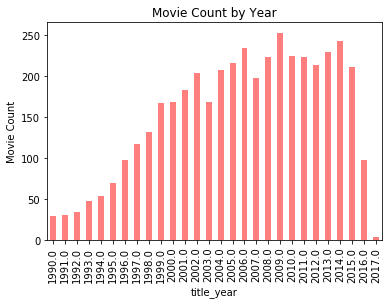

In [284]:
#Determine number of movies that were produced each year
recent_movies=movies_df[movies_df['title_year'] >= 1990]
movie_yearly_count = recent_movies['title_year'].value_counts().sort_index().plot(kind='bar', color='r', alpha=0.5, grid=False, rot=90)
movie_yearly_count.set_xlabel('title_year')
movie_yearly_count.set_ylabel('Movie Count')
movie_yearly_count.set_title('Movie Count by Year')

Now, we find all columns with float values and make a new dataframe for making a KNN classification model.We try to estimate IMDB Score of movie by other parameters, so try to remove not related columns.

In [285]:
float_columns= [col for col in movies_df.columns if movies_df.dtypes[col] == 'float64']
float_columns

['actor_1_facebook_likes',
 'actor_2_facebook_likes',
 'actor_3_facebook_likes',
 'aspect_ratio',
 'budget',
 'director_facebook_likes',
 'duration',
 'facenumber_in_poster',
 'gross',
 'imdb_score',
 'movie_facebook_likes',
 'num_critic_for_reviews',
 'num_user_for_reviews',
 'title_year']

In [286]:
#Making new model
movie_eval_df=(movies_df[float_columns]).drop(columns=['aspect_ratio','duration',\
                                                       'num_critic_for_reviews', \
                                                       'num_user_for_reviews',
                                                       'title_year']) 
movie_eval_df.head()

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,budget,director_facebook_likes,facenumber_in_poster,gross,imdb_score,movie_facebook_likes
0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
1,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
2,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
3,1000.0,936.0,855.0,NaN,NaN,0.0,NaN,7.9,33000.0
4,NaN,NaN,1000.0,NaN,563.0,0.0,NaN,7.1,NaN


In [287]:
#Removing all rows with NaN value
movie_eval_df = movie_eval_df.dropna(how='any',axis=0) 
movie_eval_df.head()

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,budget,director_facebook_likes,facenumber_in_poster,gross,imdb_score,movie_facebook_likes
284,752.0,631.0,591.0,90000000.0,23.0,0.0,6712451.0,4.4,53.0
327,623.0,508.0,393.0,10000000.0,342.0,0.0,10200000.0,7.3,578.0
330,23000.0,196.0,28.0,94000000.0,611.0,2.0,9213.0,7.6,13000.0
334,8000.0,331.0,329.0,95000000.0,116.0,0.0,86897182.0,6.2,18000.0
353,1000.0,903.0,810.0,98000000.0,212.0,3.0,11000000.0,5.6,1000.0


In [288]:
movie_eval_df.shape

(961, 9)

For changing imdb_score to categorical value, we will round it's value.

In [289]:
movie_eval_df['imdb_score']=movie_eval_df['imdb_score'].apply(lambda x: int(round(x)))
movie_eval_df.head()

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,budget,director_facebook_likes,facenumber_in_poster,gross,imdb_score,movie_facebook_likes
284,752.0,631.0,591.0,90000000.0,23.0,0.0,6712451.0,4,53.0
327,623.0,508.0,393.0,10000000.0,342.0,0.0,10200000.0,7,578.0
330,23000.0,196.0,28.0,94000000.0,611.0,2.0,9213.0,8,13000.0
334,8000.0,331.0,329.0,95000000.0,116.0,0.0,86897182.0,6,18000.0
353,1000.0,903.0,810.0,98000000.0,212.0,3.0,11000000.0,6,1000.0


In [290]:
#All value of scores
scores = movie_eval_df['imdb_score'].unique()
scores

array([4, 7, 8, 6, 5, 9])

In [291]:
#Change to categorical parameter
movie_eval_df['imdb_score'] = pd.Categorical(movie_eval_df['imdb_score'], categories=scores)

Now, our dataset is ready for KNN classification. Based on size of dataset, k could be about 35. <br>
First, we extract 20% of our data as validation set.

In [292]:
# loading libraries
import numpy as np
from sklearn.cross_validation import train_test_split

# create design matrix X and target vector y
X = np.array(movie_eval_df.iloc[:,0:13]) 
y = np.array(movie_eval_df['imdb_score']) 

# split into train and test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Now, we apply KNN algorithm and find accuracy rate.

In [293]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 35)

knn = KNeighborsClassifier(n_neighbors=35)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_val)

# evaluate accuracy
print(round(100*sum(pred == y_val)/ pred.size , 2))

45.6


This accuracy shows that KNN is not a good model and it is better to go for other models.